## ASTR 21000, Winter 2020

## Laboratory on model parameter inference

### Distributed: Monday, March 2

import packages needed by the codes below. Run this cell first before using these codes. 

In [3]:
import numpy as np

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
plot_pretty(dpi=150, fontsize=12)

### Introduction 

This lab consists of the first exercise of next coding assignment (homework 5), which will be distributed later on Monday. 

In this homework you will redo the analysis you did in homework 3 using supernovae to constrain model parameters but with a different approach. There are two differences in the approach you will use in this exercise: 

1) you will work with the *likelihood function* instead of $\chi^2$. The likelihood function and the rationale for its use, as well as relation of $\chi^2$ to this function are described below. More precisely, you will work with the likelihood function and prior probability distributions for model parameters, which combined give the pdf called *posterior distribution function*. 

2) you will use the model that abandons assumption that supernovae type Ia are "standard candles" (i.e. have the same absolute magnitude value $M_0$). Instead, the absolute magnitude of each supernova will be corrected using two of its properties measured in observations. This requires two additional parameters, which brings the number of model parameters from 3 to 5. 

Thus, we have to map out the likelihood in 5-dimensional model parameter space, which cannot be easily done by sampling on a grid as could be done for 3D parameter space in homework 3. Thus, in the two exercises in this homework you will first find the "best fit" model parameters in the first exercise and then will learn how to estimate uncertainties by sampling 5-dimensional posterior distribution. 

### Background info: probability distribution functions (pdfs) in 1- and multiple dimensions

Recall that the 1-dimensional probability distribution function, $p(x)$, is a function of one variable $x$ and is defined as probability *density* per interval of $dx$ if it is normalized as

$$\int\limits_{-\infty}^\infty p(x)dx = 1.$$

If $x$ is measured with some units, such as $grams$ or $cm$, then $p(x)$ must have unit inverse to that of $x$, so that $p(x)dx$ is *dimensionless* (has no units) and thus can be interpreted as probability to have $x$ in the range $[x, x+dx]$. 

Some pdfs can be *conditional* in that they depend on the specific values of other parameters. For example, if I have a 2-dimensional pdf, $p(x,y)$, I can define conditional 1-dimensional pdf $p(x\vert y=2)$ which is probability distribution of $x$ under condition that $y=2$. Conditional variables have no effect on units of the conditional pdf: $p(x\vert y=2)$ has units inverse of $x$, because it is pdf of $x$ and not of $y$. 

In general, pdf can be a function of more than one parameter - $p(\mathbf{x})$ where $\mathbf{x}$ is vector of variables on which pdf depends. Everything is similar to the 1-dimensional case, except we deal with many parameters instead of one. The pdf is still probability density, but now per multi-dimensional volume element $d\mathbf{x}$ and thus has units inversely proportional to the product of units of all elements of $\mathbf{x}$. It is normalized by the integral in the multidimensional space over all dimensions: 

$$\int\limits_{-\infty}^\infty p(\mathbf{x})d\mathbf{x} = 1.$$



### Likelihood function and its relation to $\chi^2$

Suppose we have a measurement of some quantity $y_i$ with a Gaussian uncertainty $\sigma_i$. Gaussianity means that the probability distribution function for the true value of $y_{i,\rm true}$ is described by the Gaussian pdf: 

$$ p(y_{i,\rm true}) = \frac{1}{\sqrt{2\pi}\sigma_i}\,\exp\left[-\frac{(y_{i}-y_{i,\rm true})^2}{2\sigma_i^2}\right].$$

Likewise, if we have a model $m(\mathbf{x})$ that depends on some vector of variables $\mathbf{x}$ and that predicts the value of $y_{i, \rm model}=m(\mathbf{x})$ as a function of these parameters, then the conditional pdf of the measurement given the model parameters $\mathbf{x}$ is 

$$ p(y_{i}\vert \mathbf{x}) = \frac{1}{\sqrt{2\pi}\sigma_i}\,\exp\left\{-\frac{[y_{i}-y_{i, \rm model}(\mathbf{x})]^2}{2\sigma_i^2}\right\}.$$

If we integrate $p(y_{i}\vert \mathbf{x})$ over all possible values of $y_i$, we will get the probability of such measurement, under condition that model is correct. 

If we have a sequence of $N_d$ *independent* measurements $\mathbf{y}=\{y_i\}$, $i=0,\ldots, N_d-1$, we can multiply all the probabilities for each individual measurement $p(y_{i}\vert \mathbf{x})$ to get the overall probability for the measurements given the model: 

$$L(\mathbf{y}\vert\mathbf{x})\equiv p(\mathbf{y}\vert\mathbf{x}) = p(y_0\vert\mathbf{x})\,p(y_1\vert\mathbf{x})\ldots p(y_{N_d-1}\vert\mathbf{x}) = \prod\limits_{i=0}^{N_d-1} p(y_i\vert\mathbf{x}),$$
which is most often called the *likelihood function* of data given model and its parameters $\mathbf{x}$. 

Probability distributions are often strongly peaked around some value and quickly become small away from the peak. Thus, for practical reasons it is convenient to work with a logarithm of the likelihood function. 

Now if we take natural log of both sides of the equation above, log of the product of pdfs will turn into sum of logarithms. If we also use the Gaussian pdf of $p(y_{i}\vert \mathbf{x})$ we will get: 

$$\ln L(\mathbf{y}\vert\mathbf{x}) = -\frac{1}{2}\,\sum\limits_{i=0}^{N_d-1}\frac{[y_{i}-y_{i, \rm model}(\mathbf{x})]^2}{\sigma_i^2} -\sum\limits_{i=0}^{N_d-1}\ln(\sqrt{2\pi}\sigma_i)= -\frac{1}{2}\,\chi^2-\sum\limits_{i=0}^{N_d-1}\ln(\sqrt{2\pi}\sigma_i).$$

or $\chi^2 = -2\ln L(\mathbf{y}\vert\mathbf{x})+\rm const$. Thus, we see that $\chi^2$ is directly related to the natural log of the likelihood function defined above. Minimizing $\chi^2$ as a function of $\mathbf{x}$ maximizes probability (because $\chi^2$ is $\ln L$ with the negative sign) that a sequence of measurements is consistent with the model. Thus, the values of $\mathbf{x}$ that minimize $\chi^2$ and maximize $L$ are the values for which model is most consistent with measurements or "fits" the measurements best. 

From this description it may seem that $\chi^2$ and likelihood $L$ are equivalent, so why introduce the latter? First of all, this should provide a more formal justification for using $\chi^2$ as an objective ("cost") function for minimization. 

However, there are two other important reasons for working with the likelihood rather than $\chi^2$: 

1. The above derivation shows that $\chi^2$ is formally justified when $p(y_{i}\vert \mathbf{x})$ can be assumed to have Gaussian form. This is not always the case in practice and other forms of likelihoods may need to be used, in which case there is no formal justification for $\chi^2$. 

2. Using likelihood is required if we want to impose constraints on the values of model parameters in the form of their *prior* pdfs, explained below. 


### Prior pdfs

Prior pdf encodes our prior expectation for values of a variable. For example, considering the problem of constraining values of $\Omega_{\rm m0}$ parameter using supernovae data, $\Omega_{\rm m0}$ is dimensionless mean density of matter in the universe and thus, as density, should have values $\geq 0$. Also, from other previous constraints, we know that $\Omega_{\rm m0}$ is highly unlikely to have values $\Omega_{\rm m0}>1$. These considerations can be encoded in the prior pdf for $\Omega_{\rm m0}$ taken to be uniform distribution in the range $\Omega_{\rm m0}\in[0,1]$:

$$p(\Omega_{\rm m0}) = \begin{cases} 1,\  \Omega_{\rm m0}\in[0,1]\\
0, \ \mathrm{otherwise}
\end{cases}$$

Prior pdfs for independent model parameters $x_1$, $x_2$,... can be multiplied to give total prior pdf: 

$$p(\mathbf{x}) = p(x_0)p(x_1)\ldots $$

We can multiply the likelihood by $p(\mathbf{x})$: $L(\mathbf{y}\vert\mathbf{x})\, p(\mathbf{x})$, which gives pdf of measurements given the model with parameters $\mathbf{x}$ that follow prior pdf. 

### Posterior pdf

The likelihood pdf introduced above is pdf for the measurements vector $\mathbf{y}$ under condition that model with its parameter values $\mathbf{x}$ is correct. The likelihood thus  has units inverse to that of $\mathbf{y}$. 

What if we want pdf for the model parameter values $\mathbf{x}$? By dimensional considerations, we need a pdf that has units inverse to those of $\mathbf{x}$, just like the prior pdf $p(\mathbf{x})$. 

The product of likelihood and prior introduced above, $L(\mathbf{y}\vert\mathbf{x})\, p(\mathbf{x})$, on the other hand has units of $[\mathbf{y}^{-1}\mathbf{x}^{-1}]$. If we can divide pdf of measurements *independent* of the model, $p(\mathbf{y})$, which has units $[\mathbf{y}^{-1}]$, we can divide by such pdf to get pdf that has units $[\mathbf{x}^{-1}]$:

$$\pi(\mathbf{x}\vert\mathbf{y}) = \frac{L(\mathbf{y}\vert \mathbf{x})p(\mathbf{x})}{p(\mathbf{d})}.$$

This pdf is called ***posterior pdf*** of model parameters given measurements and the above expression is called the *Bayes theorem* (which is simply reflection of the properties of the conditional probabilities and their dimensionalities).  

Note that pdf $p(\mathbf{d})$ *does not* depend on $\mathbf{x}$ and is called *evidence* in physics and astronomy literature or *marginal* in statistics literature. Because by definition of pdf, we must have $\int\pi d\mathbf{x}=1$ when this multi-dimensional integral is taken over all values of $\mathbf{x}$, $p(\mathbf{d})$ is normalization of the integral over $L(\mathbf{y}\vert \mathbf{x})p(\mathbf{x})$:

$$p(\mathbf{d})= \int L(\mathbf{y}\vert \mathbf{x})p(\mathbf{x}) d\mathbf{x}.$$

Below is detailed description of how this approach can be used to infer parameters of a linear model fit to a series of data points. 

### Estimating parameters of the linear model using likelihood, priors, and posterior distribution  

#### Background. 

We will use data for a sample of galaxies with measured rotation velocity, $V_{\rm rot}$ and mass of visible "baryons", $M_{\rm bar}$ (mass of stars + mass of atomic and molecular hydrogen) as in the previous assignment (from  <a href="http://adsabs.harvard.edu/abs/2016ApJ...832...11B">Bradford et al. (2016)</a>). We will estimate parameters of a best fit linear model to the relation between $\log_{10}M_{\rm bar}$ and $\log_{10}V_{\rm rot}$ (the *baryonic Tully-Fisher relation*) and their uncertainties, but using a likelihood method.

The values of $\log_{10}M_{\rm bar}$ and $\log_{10}V_{\rm rot}$ for the galaxies in this sample are read in and plotted below. 

In [5]:
from astropy.io import fits

bf1 = fits.open('data/bradford16_fig1.fits')[1].data

# log10 of the baryon mass
lmbar = bf1['MBARYON']; 
# error of the baryon mass
elmbar = bf1['MBARYON_ERR']
# width of the 21 cm line = proxy for Vrot in km/s
vrot = bf1['VW20I']; 
# error of W20b
evrot = bf1['VW20I_ERR']
# log of Vrot
lvrot = np.log10(vrot)
# approximate log error
elvrot = 0.5*(np.log10(vrot+evrot) - np.log10(np.maximum(vrot-evrot,1.e-10)))

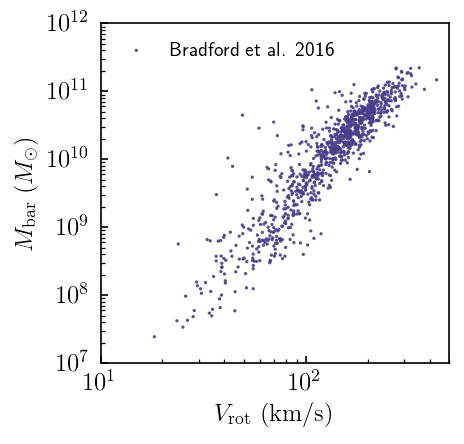

In [6]:
plot_pretty(dpi=150, fontsize=12)
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([10.,500.]); plt.ylim([1.e7,1.e12]) 
plt.xlabel(r'$V_{\rm rot}\rm\ (km/s)$'); plt.ylabel(r'$M_{\rm bar}\ (M_\odot)$')
plt.scatter(vrot, 10.**lmbar,marker='.',c='darkslateblue',s=10.,alpha=0.9,edgecolor='none', label='Bradford et al. 2016')

plt.legend(frameon=False,loc='upper left', fontsize=9)
plt.show()

Examining the plot above, you should notice that there is an overall trend that can be described by a linear relation, but there is also quite a bit of scatter.   This scatter can be due to measurement errors of $\log_{10}M_{\rm bar}$ and $\log_{10}V_{\rm rot}$. However, it is also possible that there is *intrinsic* scatter - i.e. real physical scatter of galaxies in the plane of $\log_{10}M_{\rm bar}-\log_{10}V_{\rm rot}$ around average linear region, which would be useful to constrain (if it's small) or measure. 

To this end, we will introduce an additional parameter in our model - *intrinsic* scatter, $s$, around average linear trend. 

For data vectors $\vec{x}=\{x_i\}$, $\vec{y}=\{y_i\}$ and a linear model $\vec{y}=c + m\vec{x}$ with intrinsic Gaussian scatter in $y$ direction  the likelihood can be written as (see, for example, <a href="http://adsabs.harvard.edu/abs/2005physics..11182D">D'Agostini 2005</a>): 

$$
\mathcal{L}_{\rm m,i}(x_i,y_i, C_i\vert c,m,s)=
\frac{1}{\sqrt{2\pi\sigma^2_{\rm tot,i}}}\,\exp\left[-\frac{(y_i-mx_i-c)^2}{2\sigma^2_{\rm tot,i}}\right].
$$

where

$$
\sigma^2_{\rm tot,i} = s^2+\sigma^2_{y_i}-2m\sigma_{x_iy_i}+m^2\sigma^2_{x_i},
$$

and $\sigma_{x_i}$, $\sigma_{y_i}$, and $\sigma_{x_iy_i}$ are the Gaussian uncertainties of $x_i$ and $y_i$ and their covariance, respectively, i.e. these are entries of the covariance matrix: $C_{00,i}=\sigma^2_{x,i}$, $C_{11,i}=\sigma^2_{y,i}$, and $C_{01,i}=C_{10,i}=\sigma_{x_iy_i}$. Such likelihood is equivalent to using cost function in likelihood maximization that is given by the distance from each measurement to the model line along $y$ axis.

The total likelihood for all data points is simply the product of the individual likelihoods (this assumes that measurements are independent): 

$$\mathcal{L}_{\rm m}(\vec{x},\vec{y},\mathbf{C}\vert c, m, s) = \prod\limits_{i=0}^{N_{\rm data}-1} \mathcal{L}_{\rm m,i} $$

Here we will using Bayes theoretm to estimate the intercept, $c$, slope, $m$, and intrinsic scatter $s$ of a linear model for $\log_{10} M_{\rm bar}-\log_{10} V_{\rm rot}$ for the   <a href="http://adsabs.harvard.edu/abs/2016ApJ...832...11B">Bradford et al. (2016)</a> sample.

### Prior distributions for line fitting

If we have good reasons to think that slope and intercept should be within a given range, then priors corresponding to that range should be defined. However, if we don't really know what values to expect, then prior distributions can be inferred via the following considerations. 

 Slope $m$ varies from zero to infinity, and uniform prior in $m$ would thus assign a lot of probability to large $m$ values, which can bias inferred $m$ values high. Most natural assumption is thus that angle formed by the line and say $x$ axis is uniformly distributed  $\alpha\in[-\pi/2,\pi/2]$, where $m=\tan\alpha$. Differential $dm=d\alpha/\cos^2\alpha=d\alpha(1+m^2)$. Thus, uniform prior on $\alpha$ implies 
 
$$p(m)\propto \frac{dm}{1+m^2}.$$
 
Likewise, it is natural to assume uniform prior not in $c$, because $c$ depends on the particular choice of axis $y$, which will change if reference frame is rotated, but distance from the line to the origin $(x,y)=(0,0)$, $c_\perp=c\cos\alpha=c/\sqrt{1+m^2}$, which is invariant to rotation of the frame. Then $dc_\perp = dc/\sqrt{1+m^2}$ and uniform prior in $dc_\perp$ implies 

$$p(c)\propto \frac{1}{\sqrt{1+m^2}},$$

sp that 

$$p(c,m)\propto \frac{1}{(1+m^2)^{3/2}}.$$

This prior can also be formally derived by requiring that $p(c,m)$ functional form is symmetric to switch of $x$ and $y$ axes. 

E.g., $y=c+mx$, but $x=y/m - c/m$, so for modelling in $y-x$ we have $c^\prime = -c/m$ and $m^\prime = 1/m$. Transformation of pdf's for change of variables is given by 

$$
p(c,m)=p(c^\prime,m^\prime)\vert J_{c,m\rightarrow c^\prime,m^\prime}\vert,
$$

where Jacobian $\vert J_{c,m\rightarrow c^\prime,m^\prime}\vert$ is given by 

$$\vert J_{c,m\rightarrow c^\prime,m^\prime}\vert = \begin{vmatrix}
\frac{\partial c^\prime}{\partial c} & \frac{\partial c^\prime}{\partial m} \\ 
\frac{\partial m^\prime}{\partial c} & \frac{\partial m^\prime}{\partial m}
\end{vmatrix} = 
\begin{vmatrix}
-\frac{1}{m} & \frac{c}{m^2}\\
0 & -\frac{1}{m^2}
\end{vmatrix} = \frac{1}{m^3}.
$$

So that 

$$
p(c,m)=p(c^\prime,m^\prime) \frac{1}{m^3},
$$

the functional equation that has solution 

$$
p(c,m)\propto \frac{1}{(1+m^2)^{3/2}},
$$

If we assume the uniform in scatter $s$, the overall prior is $p(c,m,s)\propto p(c,m)$.
The normalization of this pdf can also be derived (see S 2.4 and eq 26 in <a href="http://adsabs.harvard.edu/abs/2017ARA%26A..55..213S">Sharma (2017)</a>) taking into account that normalization of uniform pdf defined from $[x_{\rm min}$ to $x_{\rm max}$ is $1/(x_{\rm max}-x_{\rm min})$:

$$p(c,m)=\frac{1}{2\pi(c_{\rm max}-c_{\rm min})(s_{\rm max}-s_{\rm min})}\,\frac{1}{(1+m^2)^{3/2}},$$


So we will use this prior pdf. 


### Posterior pdf 

By the Bayes theorem: 

$$\pi(c,m,s\vert\vec{x},\vec{y},\mathbf{C})= \frac{\mathcal{L}_{\rm m}(\vec{x},\vec{y},\mathbf{C}\vert c, m, s)\,p(c,m,s)}{p(\vec{x},\vec{y},\mathbf{C})}.$$

*A priori*, we don't know the evidence $p(\vec{x},\vec{y},\mathbf{C})$. However, we can compute the product $\mathcal{L}_{\rm m}(\vec{x},\vec{y},\mathbf{C}\vert c, m, s)\,p(c,m,s)$ and thus we can 
estimate integral over this product in the parameter space: 

$$\int\int\int \mathcal{L}_{\rm m}(\vec{x},\vec{y},\mathbf{C}\vert c, m, s)\,p(c,m,s) dc dm ds \approx p(\vec{x},\vec{y},\mathbf{C})$$

and use this estimate to normalize $\mathcal{L}_{\rm m}(\vec{x},\vec{y},\mathbf{C}\vert c, m, s)\,p(c,m,s)$ to get $\pi(c,m,s\vert\vec{x},\vec{y},\mathbf{C})$ and its confidence contours.

This is done below approximately, but quite accurately. $\mathcal{L}_{\rm m}(\vec{x},\vec{y},\mathbf{C}\vert c, m, s)\,p(c,m,s)$ is mapped on 3D grid of $c$, $m$, and $s$ and 3D integral of this function is estimated as a sum of its values on the grid. 

Let's see of the errors of the two measurements are actually correlated. This can be done by both plotting them against each other.

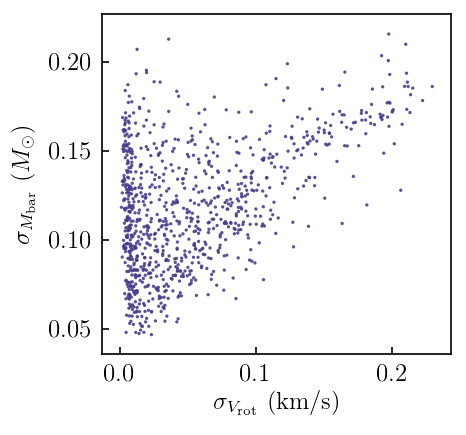

In [9]:
plt.figure(figsize=(3.,3.))
plt.xlabel(r'$\sigma_{V_{\rm rot}}\rm\ (km/s)$')
plt.ylabel(r'$\sigma_{M_{\rm bar}}\ (M_\odot)$')
plt.scatter(elvrot, elmbar, marker='.',c='darkslateblue',s=10.,alpha=0.9,
            edgecolor='none', label='Bradford et al. 2016')
plt.show()

We can also simply compute their covariance matrix using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html">numpy.cov</a> routine.

In [10]:
cov = np.cov(np.vstack((elmbar,elvrot)))

print(cov)

[[0.00119393 0.00088244]
 [0.00088244 0.00275591]]


It looks like there is a fairly sizeable correlation between errors (off-diagonal terms are not zero), so it is prudent to take it into account in our model parameter estimate.

In [192]:

normfact = 0.5 / np.pi

def prior(xd):
    """
    defines parameter priors
    
    Parameters
    ----------
    xd : numpy 1d array
        xd[0] = normalization; xd[1] = slope; xd[2] = scatter
        
    Returns
    -------
    numpy float
        ln(prior)
        
    """
    if cmin <= xd[0] and xd[0] < cmax and smin <= xd[2] and xd[2] < smax:
        return np.log(normfact/(1. + xd[0]**2)**1.5)
    else:
        return -300.



In [193]:
def linmodel_likelihood(p, x, sigx2, y, sigy2, sigxy):
    """
    ln of linear model likelihood

    Parameters:
    -----------
    p - real 1d numpy vector of size 3 
        values of the model parameters, c, m, intrinsic scatter in y direction
    x - real 1d numpy vector
        x values of data, array size = number of data points ndata
    sigx2 - real 1d numpy vector of size x
        Gaussian variances of x
    y - real 1d numpy vector
        y values of data of the same size as x 
    sigy2 - real 1d numpy vector of size 
        Gaussian variances of y
    sigxy - real 1d numpy vector of size 
        Gaussian covariances of x and y    

    Returns:
    --------

    a real number 
        ln(Likelihood of linear model with intrinsic Gaussian scatter in y direction)
    """
    
    sigtot2 = sigy2 - 2.*p[1]*sigxy + p[1]**2*sigx2 + p[2]**2
    # this step is not to allow sigtot2 to become negative which will make np.log of it below a nan (Not A Number)
    sigtot2 = np.maximum(sigtot2, 1.6e-16)
    
    # 1/sqrt(2.*pi) factor can be omitted from the likelihood because it does not depend on model parameters
    return np.sum(-0.5 * (np.log(sigtot2) + (y - p[0] - p[1]*x)**2 / sigtot2))
    

In [199]:
  
def mlinmodel_posterior(p, x, sigx2, y, sigy2, sigxy):
    """
    -ln of unnormalized posterior of the linear model 
    p - real 1d numpy vector of size 3 
        values of the model parameters, c, m, intrinsic scatter in y direction
    x - real 1d numpy vector
        x values of data, array size = number of data points ndata
    sigx2 - real 1d numpy vector of size x
        Gaussian variances of x
    y - real 1d numpy vector
        y values of data of the same size as x 
    sigy2 - real 1d numpy vector of size 
        Gaussian variances of y
    sigxy - real 1d numpy vector of size 
        Gaussian covariances of x and y    
    Returns:
    --------

    a real number 
        ln(Likelihood of linear model with intrinsic Gaussian scatter in y direction)
    """
    return -(linmodel_likelihood(p, x, sigx2, y, sigy2, sigxy) + prior(p))
    

In [200]:
from scipy.optimize import minimize

tstart = default_timer()
x0 = [3.5, 3., 0.1]
res = minimize(mlinmodel_posterior, x0, method='Nelder-Mead', 
               args=(lvrot,elvrot**2,lmbar,elmbar**2,np.cov(np.vstack((elmbar,elvrot)))[0,1]), options={'xtol': 1e-10, 'disp': True})
print("completed in %.3g sec"%(default_timer() - tstart))
print("minimum at :",res.x)


Optimization terminated successfully.
         Current function value: -589.188954
         Iterations: 131
         Function evaluations: 271
completed in 0.0222 sec
minimum at : [3.50417833 3.09571315 0.26327315]


Given that there are only 3 parameters, we can use 3D grid to sample values of the product of the likelihood and priors around the best fit parameters above. For larger number of parameters, we would need to use a more sophisticated method or MCMC sampling to sample this product. 

In [229]:
def posterior_grid3d(cmin, cmax, nc, mmin, mmax, nm, smin, smax, ns,  *args):
    ct = np.linspace(cmin, cmax, nc)
    st = np.linspace(smin, smax, ns)
    mt = np.linspace(mmin, mmax, nm)
    posterior = np.zeros((nc, nm, ns))
    for i, cd in enumerate(ct):
        for j, md in enumerate(mt):
            for k, sd in enumerate(st):
                posterior[i,j,k] = -mlinmodel_posterior(np.array([cd,md,sd]), *args)
                
    imax = np.argwhere(posterior==posterior.max()).ravel()
    pmax = posterior.max()
    posterior -= pmax
    posterior = np.clip(posterior, -100., 0.)
    print("best fit parameter values: c = %.3f; m = %.3f; s = %.4f"%(ct[imax[0]], 
                                                                       mt[imax[1]], 
                                                                       st[imax[2]]))
    return imax, posterior

In [228]:
from timeit import default_timer

cmin = 2.5; cmax = 4.5 # flat prior range on normalization
smin = 0.1; smax = 0.4 # flat prior range on scatter
mmin, mmax = 2., 4.5
# normalization factor; 0.5 is from the normalization by the integral int^{infty}_{-infty} dm/(1+m^2)^{3/2}
nc, nm, ns = 100, 100, 100


args = [lvrot, elvrot**2, lmbar, elmbar**2, 
        np.cov(np.vstack((elmbar,elvrot)))[0,1]]
tstart = default_timer()
imax, posterior = posterior_grid3d(cmin, cmax, nc, mmin, mmax, nm, smin, smax, ns, *args)

print("finished in %.3g sec"%(default_timer()-tstart))

0.0 -100.0 0.0
best fit parameter values: c = 3.470; m = 3.111; s = 0.2636
finished in 40.5 sec


In [231]:
from scipy.optimize import brentq

def conf_interval(x, pdf, conf_level):
    """
    helper routine for numerical solution of the confidence level
    enclosing a given fraction of the total integral
    """
    return np.sum(pdf[pdf > x])-conf_level

In [232]:
# use a simple sum over the grid as a rough approximation of the 3D integral
evidence = np.sum(np.exp(posterior)) 
# check value
logevidence = np.log(evidence)

In [233]:
conflevs = [0.6827, 0.9545]
levs = []

for cl in conflevs:  
    
    sig = brentq(conf_interval, 0., 1., args=(np.exp(posterior-logevidence), cl) )   
    levs.append(sig)


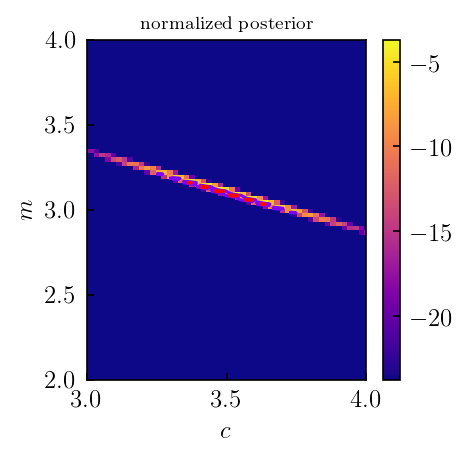

In [234]:
from codes.plot_utils import plot_color_map

cg, mg = np.meshgrid(ct, mt, sparse=False, indexing='ij')

plot_color_map(cg, mg, posterior[:,:,imax[2]]-logevidence, 
               xlim=[3,4], ylim=[2,4],  
               xlabel = r'$c$', ylabel = '$m$', cmap='plasma', colorbar=True, 
               plot_title=r'${\rm normalized\ posterior}$', contours=True, 
               contcmap='rainbow', levels = sorted(np.log(levs)), figsize=3.0)

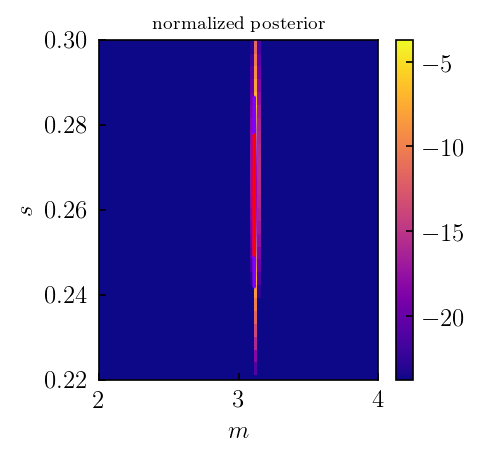

In [235]:
mg, sg = np.meshgrid(mt, st, sparse=False, indexing='ij')

plot_color_map(mg, sg, posterior[imax[0],:,:]-logevidence, 
               xlim=[2.,4], ylim=[0.22, 0.3],  
               xlabel = r'$m$', ylabel = '$s$', cmap='plasma', colorbar=True, 
               plot_title=r'${\rm normalized\ posterior}$', contours=True, 
               contcmap='rainbow', levels = sorted(np.log(levs)), figsize=3.0)

We can see that $c$ and $m$ parameters are quite "*degenerate*" - i.e. likelihood is large within a narrow ridge that correspond to different pairs of $c$ and $m$ values. This is simply because normalization is defined relative to the origin of the axis at $(0,0)$, while our data is far from the origin. We can subtract mean value of $x$ and $y$ of the data to bring the data to the origin (this is called *data pivoting*) and recompute the posterior to see the effect. This is done below. 

In [238]:
args = [lvrot-np.mean(lvrot), elvrot**2, lmbar-np.mean(lmbar), elmbar**2, 
        np.cov(np.vstack((elmbar,elvrot)))[0,1]]


In [243]:
cmin, cmax = -1., 1.
imax, posterior = posterior_grid3d(cmin, cmax, nc, mmin, mmax, nm, smin, smax, ns, *args)


best fit parameter values: c = -0.010; m = 3.086; s = 0.2636


In [244]:
# use a simple sum over the grid as a rough approximation of the 3D integral
evidence = np.sum(np.exp(posterior)) 
# check value
logevidence = np.log(evidence)

In [245]:
conflevs = [0.6827, 0.9545]
levs = []

for cl in conflevs:  
    
    sig = brentq(conf_interval, 0., 1., args=(np.exp(posterior-logevidence), cl) )   
    levs.append(sig)


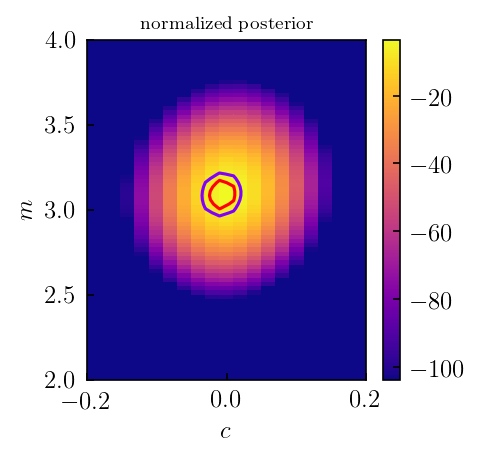

In [249]:
from codes.plot_utils import plot_color_map

ct = np.linspace(cmin, cmax, nc)
mt = np.linspace(mmin, mmax, nm)
cg, mg = np.meshgrid(ct, mt, sparse=False, indexing='ij')

plot_color_map(cg, mg, posterior[:,:,imax[2]]-logevidence, 
               xlim=[-0.2,0.2], ylim=[2,4],  
               xlabel = r'$c$', ylabel = '$m$', cmap='plasma', colorbar=True, 
               plot_title=r'${\rm normalized\ posterior}$', contours=True, 
               contcmap='rainbow', levels = sorted(np.log(levs)), figsize=3.0)

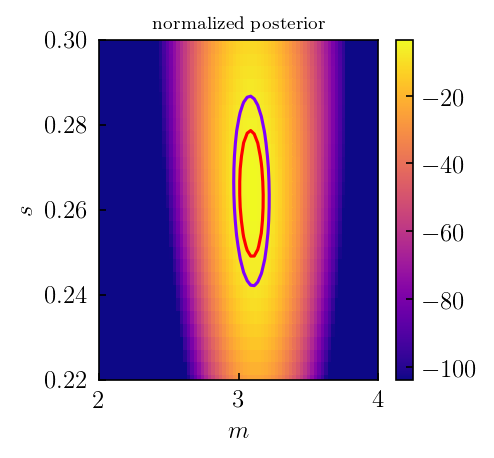

In [250]:
st = np.linspace(smin, smax, ns)
mg, sg = np.meshgrid(mt, st, sparse=False, indexing='ij')

plot_color_map(mg, sg, posterior[imax[0],:,:]-logevidence, 
               xlim=[2.,4], ylim=[0.22, 0.3],  
               xlabel = r'$m$', ylabel = '$s$', cmap='plasma', colorbar=True, 
               plot_title=r'${\rm normalized\ posterior}$', contours=True, 
               contcmap='rainbow', levels = sorted(np.log(levs)), figsize=3.0)

We can see that this removed degeneracy and now we have a good view of the posterior distribution and constraints of the parameters. We can see that slope is $\approx 3.1$ and data indicates presence of significant intrinsic scatter of $s\approx 0.27$. 

### Additional recommended reading:

* S 1-3 of  <a href="https://arxiv.org/pdf/1205.4446.pdf">"Data analysis recipes: Probability calculus for inference"</a> by David Hogg (2012)

* <a href="https://arxiv.org/abs/physics/9906048">"Overcoming prior anxiety"</a> by G. D'Agostini (1999)

* S 2 of the <a href="http://adsabs.harvard.edu/abs/2017ARA%26A..55..213S">ARA&A review</a> by Sanjib Sharma on MCMC methods for Bayesian data analysis in astronomy.